In [1]:
import csv
import numpy as np

def load_tsv(filename):
    fh = open(filename, 'r')
    csv_fh = csv.reader(fh, delimiter='\t')
    
    header = csv_fh.next()
    data = []
    for row in csv_fh:
        data.append(row)
    
    data = np.array(data)
        
    X = data[:, 0:-1].astype(np.float)
    y = data[:, -1].astype(np.float)
    
    return(X, y, header)

In [2]:
X, y, header = load_tsv('data/brain-body-weight.tsv')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr = lr.fit(X_train, y_train)

In [7]:
lr.coef_

array([ 1.74694497])

In [8]:
lr.score(X_test, y_test)

-0.18387056492104614

In [9]:
# Importing matplotlib's library
import matplotlib.pyplot as plt

# Function for plotting Linear Regression
def plot_linear_regression(train_data, train_target, test_data, test_target):
    # plot train data as black dots
    plt.scatter(train_data, train_target, color='black')
    # plot train data as red dots
    plt.scatter(test_data, test_target, color='red')
    # plot the linear regression model as blue line
    plt.plot(test_data, lr.predict(test_data), color='blue')
    plt.show()

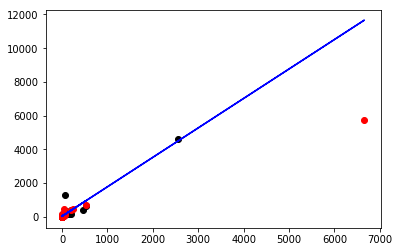

In [10]:
plot_linear_regression(X_train, y_train, X_test, y_test)

In [11]:
header

['Brain Weight', 'Body Weight']

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    LinearRegression(),
    DecisionTreeClassifier(max_depth=3),
    KNeighborsClassifier(n_neighbors=3)
]

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    clf.score(X_test, y_test)

ValueError: Unknown label type: 'continuous'